<a href="https://colab.research.google.com/github/hoonzi-s/APC/blob/main/%231%20ALK%20-%20213BTMRVP%20Inferential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 불러오기

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 

# 데이터 전처리

In [155]:
data_origin = pd.read_csv('/content/drive/MyDrive/#1 ALK RVP CSV.csv', index_col = 0)
data_origin.info()
data_origin.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2708 entries, 2014-09-16 to 2022-05-17
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RVP_LAB         2708 non-null   float64
 1   S.B5.213TI2804  2708 non-null   float64
 2   S.B5.213PI2806  2708 non-null   float64
 3   S.B5.213FC2602  2708 non-null   float64
dtypes: float64(4)
memory usage: 105.8+ KB


,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806,S.B5.213FC2602
count,2708.000000,2708.000000,2708.000000,2708.000000
mean,39.308013,133.969684,335.047833,85.923927
std,3.406074,3.452283,29.851255,10.770634
min,28.500000,97.606803,291.821242,35.510519
25%,37.400000,131.998333,318.077753,80.966155
50%,39.000000,133.436735,325.511703,88.584186
75%,40.700000,136.158762,338.359004,92.780427
max,98.600000,145.939417,520.512731,113.968771


In [156]:
data_origin.columns = ['RVP', 'T', 'P', 'F']
data = data_origin[(data_origin['RVP'] < 70) & (data_origin['T'] > 120)]
# data = data_origin[data_origin['RVP'] < 70].sort_values(by = 'RVP')
# data.reset_index(drop = True, inplace = True)
data

,RVP,T,P,F
2014-09-16,35.5,136.582564,335.836740,89.956760
2014-09-17,33.5,138.822292,338.164993,89.462762
2014-09-18,34.4,138.079717,339.017050,91.780995
2014-09-19,34.3,137.367731,335.839848,96.444227
2014-09-20,35.2,137.442057,349.710404,91.365322
...,...,...,...,...
2022-05-13,43.7,127.127323,326.187806,84.417961
2022-05-14,49.9,123.287827,321.014425,96.055985
2022-05-15,48.7,125.099084,332.709037,92.796671
2022-05-16,51.0,122.406470,325.956086,95.187382


In [157]:
A = 7.00961   # Temperature in Celsius
B = 1022.48
C = 248.145
P_ref = (335 / 101.325 + 1) * 760   # kPa to mmHg

data['PCT'] = data.iloc[:, 1] + B * np.log10(P_ref / (data.iloc[:, 2] / 101.325 + 1) / 760) / (A - np.log10(P_ref)) / (A - np.log10((data.iloc[:, 2] / 101.325 + 1) * 760))
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RVP,T,P,F,PCT
2014-09-16,35.5,136.582564,335.836740,89.956760,136.512888
2014-09-17,33.5,138.822292,338.164993,89.462762,138.559265
2014-09-18,34.4,138.079717,339.017050,91.780995,137.746123
2014-09-19,34.3,137.367731,335.839848,96.444227,137.297795
2014-09-20,35.2,137.442057,349.710404,91.365322,136.231441
...,...,...,...,...,...
2022-05-13,43.7,127.127323,326.187806,84.417961,127.867296
2022-05-14,49.9,123.287827,321.014425,96.055985,124.467575
2022-05-15,48.7,125.099084,332.709037,92.796671,125.290371
2022-05-16,51.0,122.406470,325.956086,95.187382,123.166055


[]

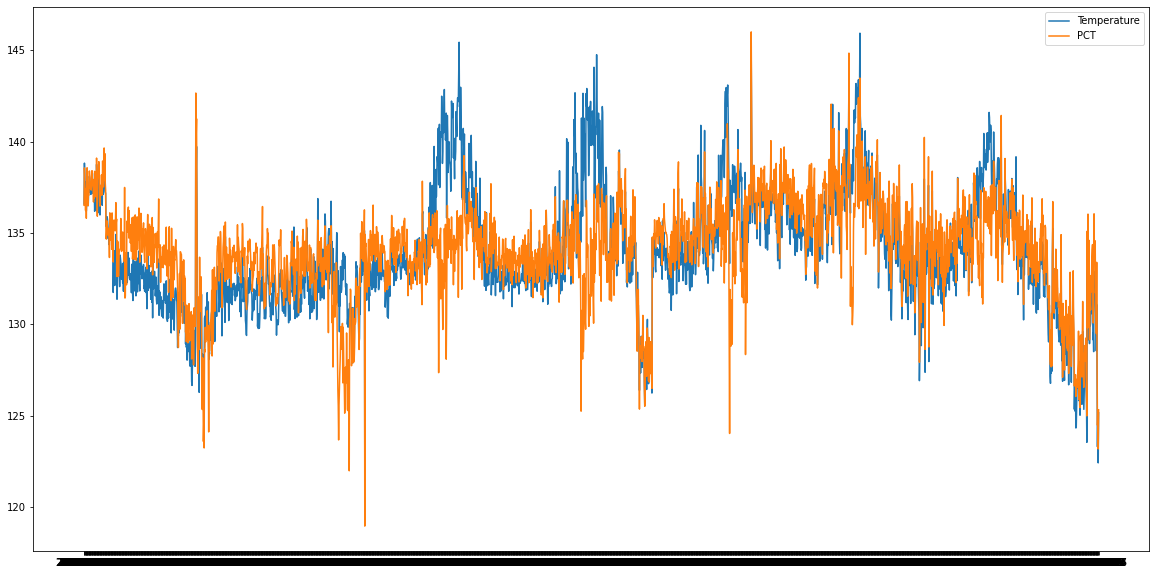

In [159]:
plt.figure(figsize = (20, 10))
plt.plot(data['T'], label = 'Temperature')
plt.plot(data['PCT'], label = 'PCT')
plt.legend()
plt.plot()

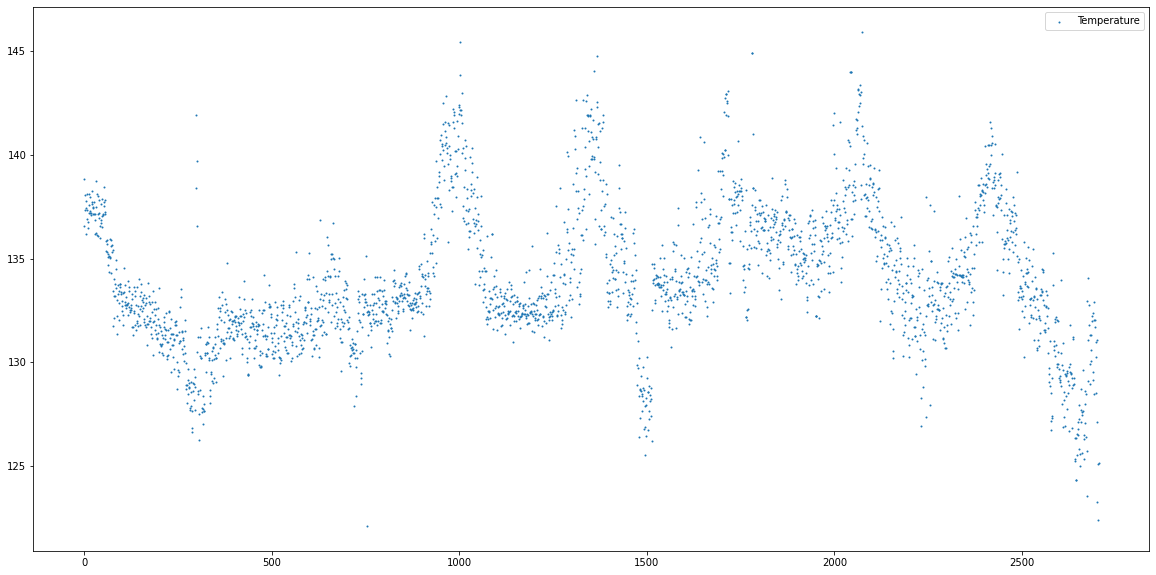

In [158]:
plt.figure(figsize = (20, 10))
# plt.scatter(np.arange(data.shape[0]), data.iloc[:, 0], label = 'RVP', s = 1)
plt.scatter(np.arange(data.shape[0]), data.iloc[:, 1], label = 'Temperature', s = 1)
# plt.scatter(np.arange(data.shape[0]), data.iloc[:, 2], label = 'Pressure', s = 1)
# plt.scatter(np.arange(data.shape[0]), data.iloc[:, 3], label = 'Flow', s = 1)
plt.legend()
plt.show()

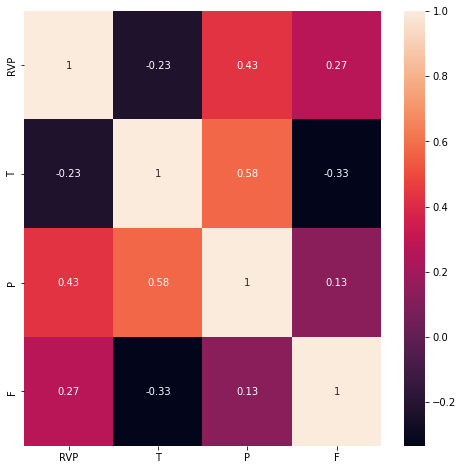

In [112]:
plt.figure(figsize = (8, 8))
sns.heatmap(data.corr(), linecolor = 'white', annot = True)
plt.show()

# 엑셀 TP 선형회귀

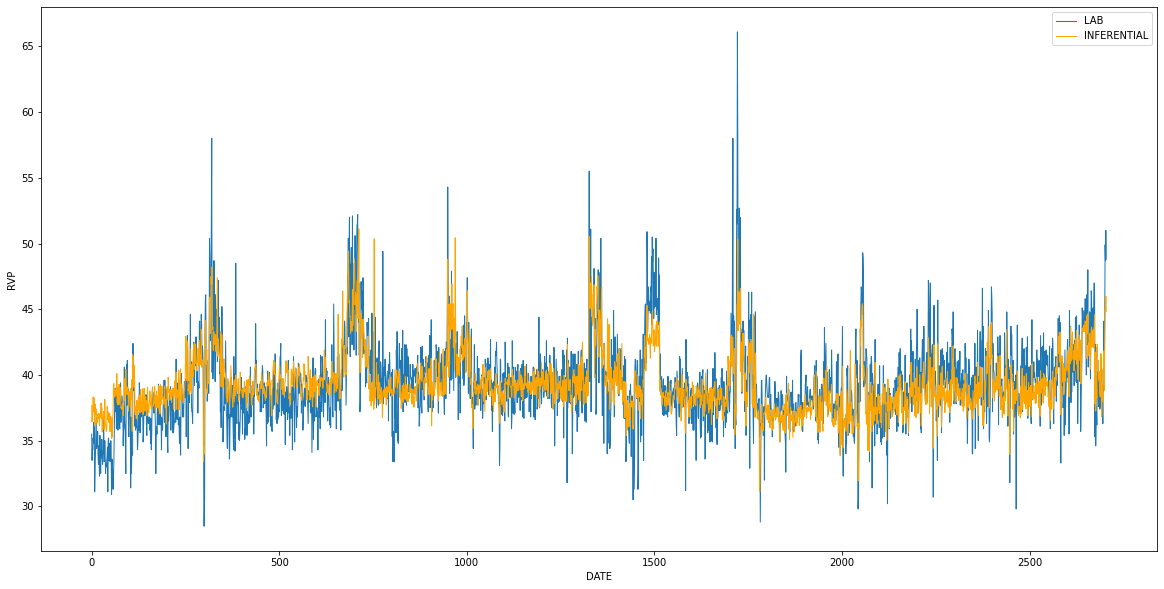

In [114]:
# 엑셀 TP선형회귀

a1 = -0.64629773271978
a2 = 0.0864458455008808
b = 96.928823280233
inferential = a1 * data['T'] + a2 * data['P'] + b
length = data.shape[0]

plt.figure(figsize = (20, 10))
# plt.scatter(np.arange(length), data['RVP'], s = 1, label = 'LAB')
plt.plot(np.arange(length), data['RVP'], linewidth = 1, label = 'LAB')
plt.plot(np.arange(length), inferential, linewidth = 1, color='orange', label = 'INFERENTIAL')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

# PolynomialFeatures + log

In [160]:
input = data.iloc[:, 1:-1]
log = np.log10(input).reset_index(drop = True, inplace = False)
log.columns = ['logT', 'logP', 'logF']
log

,logT,logP,logF
0,2.135395,2.526128,1.954034
1,2.142459,2.529129,1.951642
2,2.140130,2.530222,1.962753
3,2.137885,2.526132,1.984276
4,2.138120,2.543709,1.960781
...,...,...,...
2700,2.104239,2.513468,1.926435
2701,2.090920,2.506525,1.982524
2702,2.097254,2.522065,1.967532
2703,2.087804,2.513159,1.978579


In [161]:
target = data['RVP']
target

2014-09-16    35.5
2014-09-17    33.5
2014-09-18    34.4
2014-09-19    34.3
2014-09-20    35.2
              ... 
2022-05-13    43.7
2022-05-14    49.9
2022-05-15    48.7
2022-05-16    51.0
2022-05-17    48.8
Name: RVP, Length: 2705, dtype: float64

In [118]:
pf = PolynomialFeatures(include_bias = False)
pf.fit(input)
poly = pf.transform(input)
# poly.get_feature_names_out()
# input_poly.shape
poly = pd.DataFrame(poly, columns = ['T1', 'P1', 'F1', 'T2', 'T1P1', 'T1F1', 'P2', 'P1F1', 'F2'])
poly
poly_log = pd.concat([poly, log], axis = 1)
poly_log

,T1,P1,F1,T2,T1P1,T1F1,P2,P1F1,F2,logT,logP,logF
0,136.582564,335.836740,89.956760,18654.796843,45869.443102,12286.524979,112786.315934,30210.785097,8092.218711,2.135395,2.526128,1.954034
1,138.822292,338.164993,89.462762,19271.628839,46944.839490,12419.425748,114355.562423,30253.174402,8003.585851,2.142459,2.529129,1.951642
2,138.079717,339.017050,91.780995,19066.008357,46811.378458,12673.093909,114932.560191,31115.322310,8423.751118,2.140130,2.530222,1.962753
3,137.367731,335.839848,96.444227,18869.893410,46133.557724,13248.324638,112788.403303,32389.814618,9301.488985,2.137885,2.526132,1.984276
4,137.442057,349.710404,91.365322,18890.318977,48064.917251,12557.437755,122297.366876,31951.403643,8347.622037,2.138120,2.543709,1.960781
...,...,...,...,...,...,...,...,...,...,...,...,...
2700,127.127323,326.187806,84.417961,16161.356228,41467.382552,10731.829347,106398.484848,27536.109393,7126.392087,2.104239,2.513468,1.926435
2701,123.287827,321.014425,96.055985,15199.888336,39577.170983,11842.533680,103050.261186,30835.356812,9226.752254,2.090920,2.506525,1.982524
2702,125.099084,332.709037,92.796671,15649.780768,41621.595713,11608.778553,110695.303368,30874.291138,8611.222195,2.097254,2.522065,1.967532
2703,122.406470,325.956086,95.187382,14983.344020,39899.134074,11651.551446,106247.370261,31026.906456,9060.637660,2.087804,2.513159,1.978579


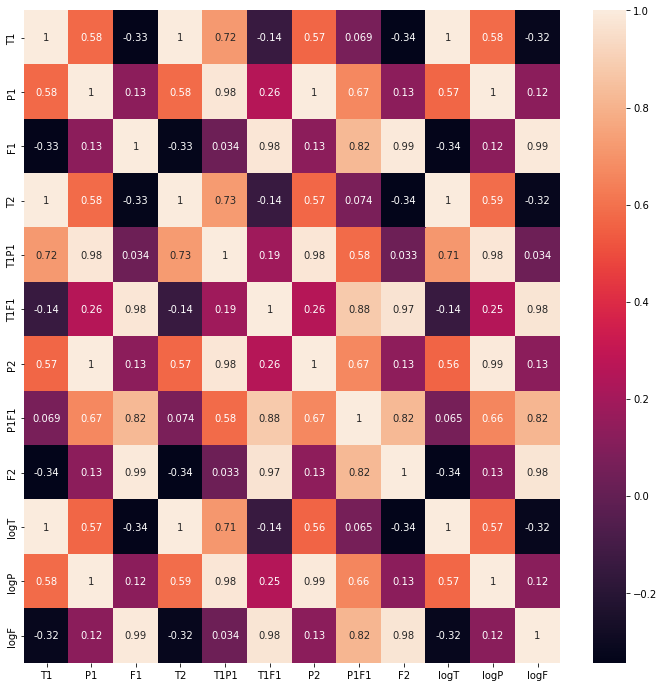

In [119]:
plt.figure(figsize = (12, 12))
sns.heatmap(poly_log.corr(), linecolor = 'white', annot = True)
plt.show()

# 훈련 세트 나누기

In [128]:
train_input, test_input, train_target, test_target = tts(poly_log, target, test_size = 0.1)

# 사이킷런 poly 선형회귀

In [129]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
print(lr.coef_)
print(lr.intercept_)

0.547441905646014
0.6086958828385826
[ 1.14952693e+02  5.11300433e-01  1.54229601e+00 -2.17371165e-01
  2.12817524e-03 -1.64734958e-02 -6.95265334e-04  1.33920364e-03
 -7.21397104e-05 -1.75038417e+04 -2.61592325e+02  3.81028128e+01]
26188.525163024115


In [130]:
a = lr.coef_
b = lr.intercept_
lr_result = np.sum(a * poly_log, axis = 1) + b
print(lr_result.shape)
lr_result

(2705,)


0       37.189365
1       35.548339
2       36.064191
3       35.821235
4       37.941086
          ...    
2700    43.598216
2701    47.894150
2702    46.740326
2703    49.367364
2704    46.283440
Length: 2705, dtype: float64

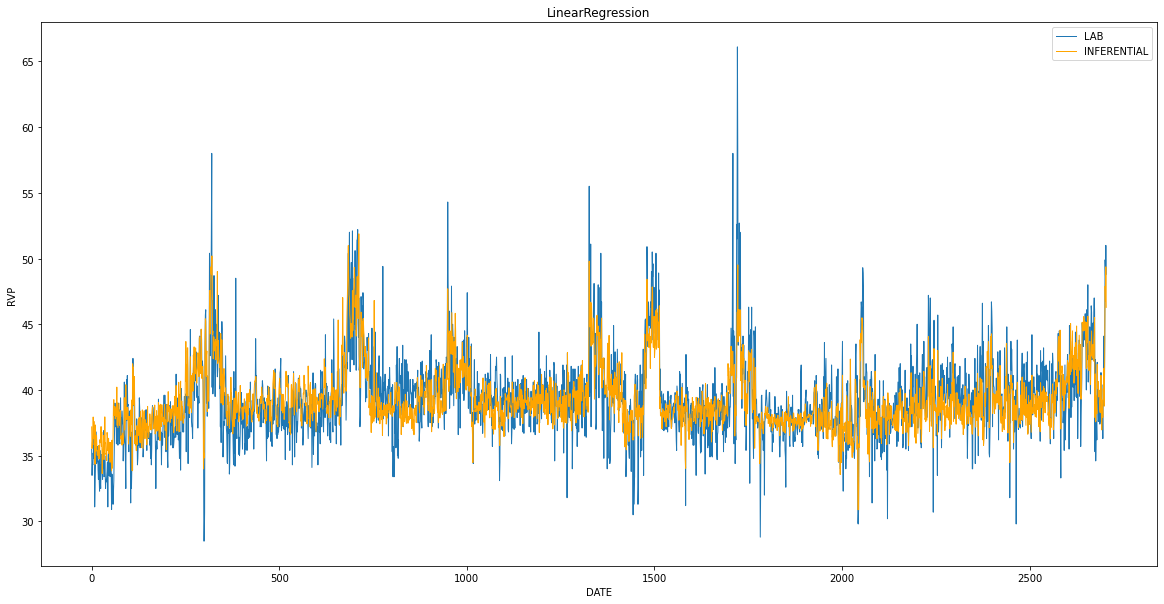

In [131]:
plt.figure(figsize = (20, 10))
# plt.scatter(np.arange(length), data['RVP'], label = 'LAB', s = 2)
# plt.scatter(np.arange(length), result, label = 'RESULT', s = 2, color = 'orange')
plt.plot(np.arange(length), target, label = 'LAB', linewidth = 1)
plt.plot(np.arange(length), lr_result, label = 'INFERENTIAL', linewidth = 1, color = 'orange')
plt.title('LinearRegression')
plt.xlabel('DATE')
plt.ylabel('RVP')
# plt.xlim(2000, 2710)
# plt.grid()
plt.legend()
plt.show()

# PCT



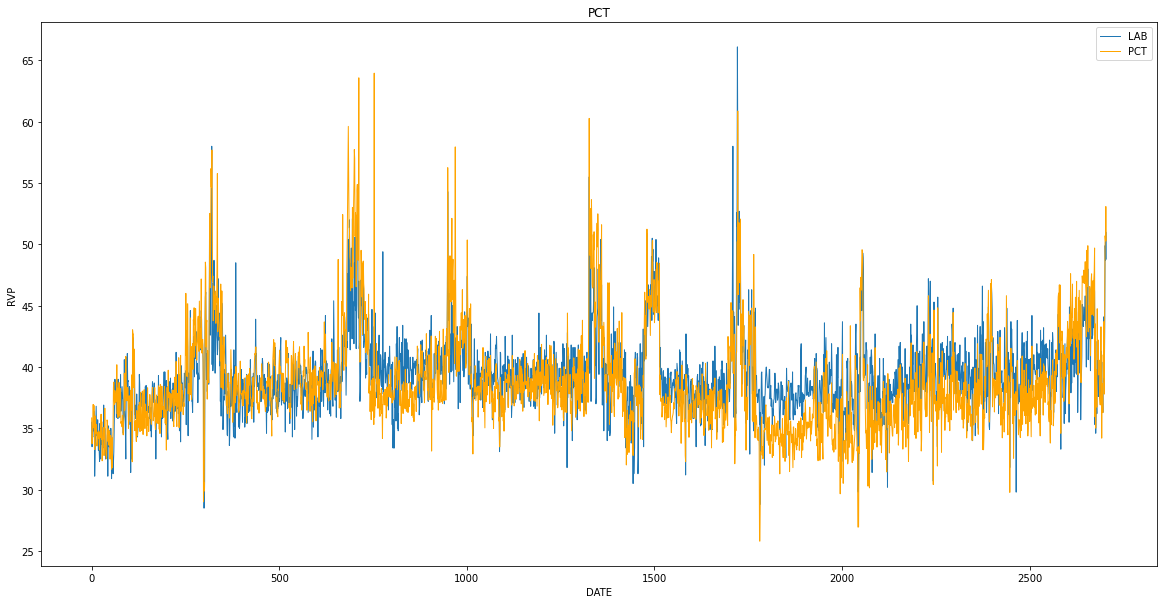

In [146]:
pct = np.exp(51.596*(311-(data['T']+273.15)*(16052-1902*np.log((data['P']/101.325+1)))/(16052-(data['P']/101.325+1)*np.log((data['P']/101.325+1))))/(1902-(data['T']+273.15)*(16052-1902*np.log((data['P']/101.325+1)))/(16052-(data['P']/101.325+1)*np.log((data['P']/101.325+1)))))*101.325-4.50907
plt.figure(figsize = (20, 10))

plt.plot(np.arange(length), target, label = 'LAB', linewidth = 1)
plt.plot(np.arange(length), pct, label = 'PCT', linewidth = 1, color = 'orange')
plt.title('PCT')
plt.xlabel('DATE')
plt.ylabel('RVP')
# plt.xlim(2000, 2710)
# plt.grid()
plt.legend()
plt.show()

In [133]:
error = pd.DataFrame(index = ['MAE', 'MSE'], columns=['Inferential', 'PCT', 'LR'])

error.loc['MAE']['Inferential'] = mean_absolute_error(data['RVP'], inferential)
error.loc['MSE']['Inferential'] = mean_squared_error(data['RVP'], inferential)

error.loc['MAE']['LR'] = mean_absolute_error(data['RVP'], lr_result)
error.loc['MSE']['LR'] = mean_squared_error(data['RVP'], lr_result)

error.loc['MAE']['PCT'] = mean_absolute_error(data['RVP'], pct)
error.loc['MSE']['PCT'] = mean_squared_error(data['RVP'], pct)

error

,Inferential,PCT,LR
MAE,1.619162,2.184556,1.565803
MSE,4.928203,8.272536,4.590013


In [140]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
input_scaled = ss.transform(poly_log)

lr_ss = LinearRegression()
lr_ss.fit(train_scaled, train_target)
print(lr_ss.score(train_scaled, train_target))
print(lr_ss.score(test_scaled, test_target))

a = lr_ss.coef_
b = lr_ss.intercept_
lr_ss_result = np.sum(a * input_scaled, axis = 1) + b

0.5474419056459892
0.6086958828381708


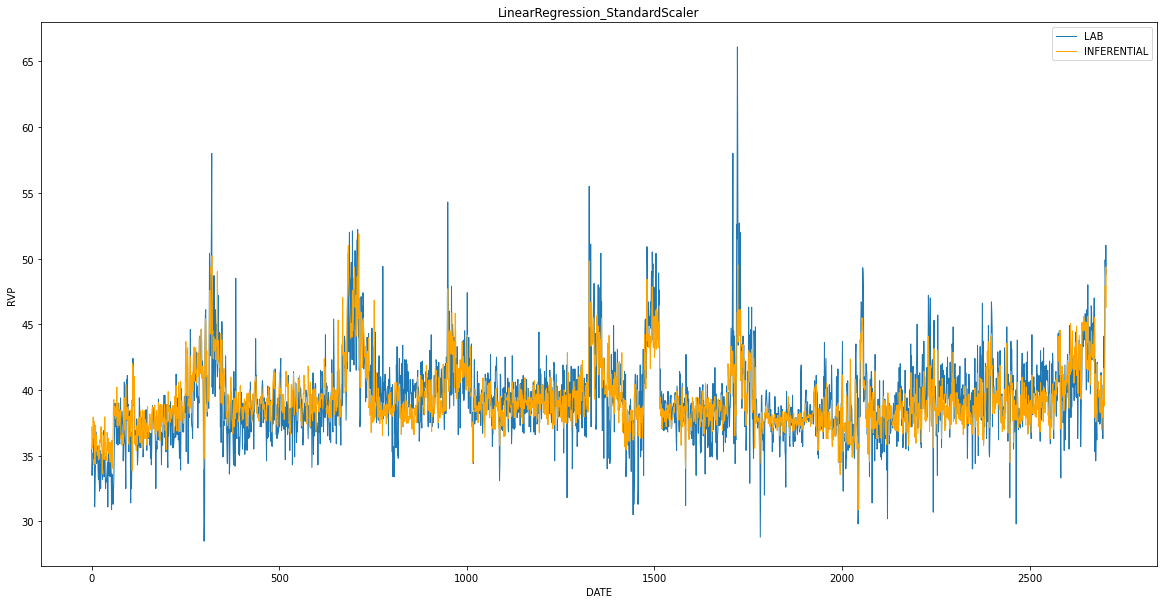

In [142]:
plt.figure(figsize = (20, 10))
# plt.scatter(np.arange(length), data['RVP'], label = 'LAB', s = 2)
# plt.scatter(np.arange(length), result, label = 'RESULT', s = 2, color = 'orange')
plt.plot(np.arange(length), target, label = 'LAB', linewidth = 1)
plt.plot(np.arange(length), lr_ss_result, label = 'INFERENTIAL', linewidth = 1, color = 'orange')
plt.title('LinearRegression_StandardScaler')
plt.xlabel('DATE')
plt.ylabel('RVP')
# plt.xlim(2000, 2710)
# plt.grid()
plt.legend()
plt.show()

In [144]:
error['LR_SS'] = mean_absolute_error(data['RVP'], lr_ss_result), mean_squared_error(data['RVP'], lr_ss_result)

error

,Inferential,PCT,LR,LR_SS
MAE,1.619162,2.184556,1.565803,1.565803
MSE,4.928203,8.272536,4.590013,4.590013


In [101]:
pct

2014-09-16    35.848623
2014-09-17    33.741695
2014-09-18    34.663546
2014-09-19    34.977717
2014-09-20    36.951044
                ...    
2022-05-13    46.099999
2022-05-14    50.699962
2022-05-15    50.294738
2022-05-16    53.086036
2022-05-17    50.284085
Length: 2707, dtype: float64

In [145]:
print(np.mean(data['T']))
print(np.mean(data['P']))

134.00399254303136
335.0219945818122


In [152]:
A = 7.00961   # Temperature in Celsius
B = 1022.48
C = 248.145
P_ref = (335 / 101.325 + 1) * 760   # kPa to mmHg

data['PCT'] = data.iloc[:, 1] + B * np.log10(P_ref / (data.iloc[:, 2] / 101.325 + 1) / 760) / (A - np.log10(P_ref)) / (A - np.log10((data.iloc[:, 2] / 101.325 + 1) * 760))
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RVP,T,P,F,PCT
2014-09-16,35.5,136.582564,335.836740,89.956760,136.512888
2014-09-17,33.5,138.822292,338.164993,89.462762,138.559265
2014-09-18,34.4,138.079717,339.017050,91.780995,137.746123
2014-09-19,34.3,137.367731,335.839848,96.444227,137.297795
2014-09-20,35.2,137.442057,349.710404,91.365322,136.231441
...,...,...,...,...,...
2022-05-13,43.7,127.127323,326.187806,84.417961,127.867296
2022-05-14,49.9,123.287827,321.014425,96.055985,124.467575
2022-05-15,48.7,125.099084,332.709037,92.796671,125.290371
2022-05-16,51.0,122.406470,325.956086,95.187382,123.166055


In [153]:
np.mean(abs(data['T'] - data['PCT']))

1.6681873551367057

In [154]:
input

,T,P,F
2014-09-16,136.582564,335.836740,89.956760
2014-09-17,138.822292,338.164993,89.462762
2014-09-18,138.079717,339.017050,91.780995
2014-09-19,137.367731,335.839848,96.444227
2014-09-20,137.442057,349.710404,91.365322
...,...,...,...
2022-05-13,127.127323,326.187806,84.417961
2022-05-14,123.287827,321.014425,96.055985
2022-05-15,125.099084,332.709037,92.796671
2022-05-16,122.406470,325.956086,95.187382


In [ ]:
lr_pct = 